In [1]:
# Libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'

# Data preparation

In [2]:
df= pd.read_csv("results_experiment.csv")
df.head()

,participant_ID,question_number,vis_type,correct_answer,time_(s)
0,1,1,heatmap,1,29.60
1,1,2,scatterplot,1,18.13
2,1,3,heatmap,1,38.22
3,1,4,scatterplot,1,16.75
4,1,5,heatmap,1,10.94


In [3]:
df1 = df.groupby(['participant_ID', 'vis_type']).agg(
    correct_answers=('correct_answer', 'sum'),
    total_time=('time_(s)', 'sum')
).reset_index()
df1.head()

,participant_ID,vis_type,correct_answers,total_time
0,1,heatmap,10,166.40
1,1,scatterplot,8,275.63
2,2,heatmap,10,93.94
3,2,scatterplot,8,103.60
4,3,heatmap,9,87.99


In [4]:
df2 = df1.pivot(index='participant_ID', columns='vis_type', values=['correct_answers', 'total_time'])

df2.columns = [f"{col[0]} {col[1]}" for col in df2.columns]

df2.reset_index(inplace=True)
df2.rename(columns={
    "correct_answers heatmap":"correct_HM",
     "correct_answers scatterplot":"correct_SP", 
     "total_time heatmap":"total_time_HM",
    "total_time scatterplot":"total_time_SP"},
    inplace=True)

df2['correct_HM']=df2['correct_HM'].astype(int)
df2['correct_SP']=df2['correct_SP'].astype(int)
df2['%correct_HM']=df2['correct_HM']*10
df2['%correct_SP']=df2['correct_SP']*10
df2['average_time_HM']=df2['total_time_HM']/10
df2['average_time_SP']=df2['total_time_SP']/10

df2

,participant_ID,correct_HM,correct_SP,total_time_HM,total_time_SP,%correct_HM,%correct_SP,average_time_HM,average_time_SP
0,1,10,8,166.40,275.63,100,80,16.640,27.563
1,2,10,8,93.94,103.60,100,80,9.394,10.360
2,3,9,9,87.99,85.78,90,90,8.799,8.578
3,4,10,9,164.61,352.66,100,90,16.461,35.266
4,5,10,8,152.96,255.55,100,80,15.296,25.555
5,6,10,9,81.88,169.47,100,90,8.188,16.947
6,7,10,10,164.89,188.85,100,100,16.489,18.885
7,8,10,10,94.93,147.16,100,100,9.493,14.716
8,9,8,9,145.26,321.43,80,90,14.526,32.143
9,10,9,10,110.21,151.85,90,100,11.021,15.185


# Histograms correct answers

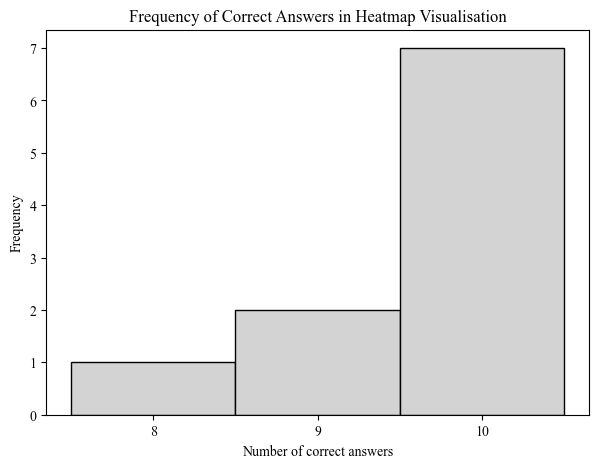

In [5]:
plt.figure(figsize=(7,5))
plt.hist(df2['correct_HM'], bins=[7.5,8.5,9.5,10.5], color='lightgray', edgecolor='black')

plt.xticks([8, 9, 10], ['8', '9', '10'])
plt.title('Frequency of Correct Answers in Heatmap Visualisation')
plt.xlabel('Number of correct answers')
plt.ylabel('Frequency')

plt.show()

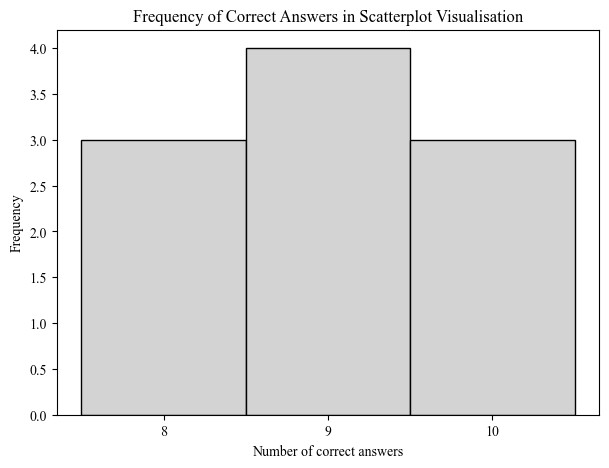

In [6]:
plt.figure(figsize=(7,5))
plt.hist(df2['correct_SP'], bins=[7.5,8.5,9.5,10.5], color='lightgray', edgecolor='black')

plt.xticks([8, 9, 10], ['8', '9', '10'])
plt.title('Frequency of Correct Answers in Scatterplot Visualisation')
plt.xlabel('Number of correct answers')
plt.ylabel('Frequency')


plt.show()

# T-test (two tailed): Average Correct Answer Percentage

Two tailed T-test is the one used where the hypothesis are:

- $H_0$: There is no significant difference between the two groups: heatmap visualisation and scatterplot visualisation.
- $H_a$: There is a significant difference between the two visualisations.
    
If the alternative hypothesis is accepted, there is no way to figure it out at which direction is the difference. 

In [7]:
# Perform the paired samples t-test
t_stat_avg, p_value_avg = stats.ttest_rel(df2['%correct_HM'], df2['%correct_SP'])

# Print the results
print(f"T-statistic: {t_stat_avg}")
print(f"P-value: {p_value_avg}")

# Interpretation
alpha = 0.05  # significance level
if p_value_avg < alpha:
    print("Null hypothesis rejected: There is a significant difference between the Average Correct Answer Percentage of heatmap and scatterplot visualisation.")
else:
    print("Null hypothesis accepted: There is no significant difference between the Average Correct Answer Percentage of heatmap and scatterplot visualisation.")

T-statistic: 1.616447718240974
P-value: 0.14045297087829434
Null hypothesis accepted: There is no significant difference between the Average Correct Answer Percentage of heatmap and scatterplot visualisation.


# T-test (one-tailed): Average Correct Answer Percentage

One tailed T-test is used to know at which direction is the difference. Here the hypothesis are:

- $H_0$: % Correct answer (Scatterplot) $\geq$ % Correct answer (Heatmap)
- $H_a$: % Correct answer (Scatterplot) < % Correct answer (Heatmap)


In [8]:
# Para una cola a la derecha
if t_stat_avg > 0 and p_value_avg / 2 < 0.05:
    print("Null hypothesis rejected: There is a significant difference and the Average Correct Answer Percentage of heatmap visualisation is greater than the Average Correct Answer Percentage of scatterplot visualisation")
else:
    print("There is no sufficient evidence to reject the null hypothesis.")

There is no sufficient evidence to reject the null hypothesis.


# T-test (two tailed): Average Answer Time

Two tailed T-test is the one used where the hypothesis are:

- $H_0$: There is no significant difference between the average time taken to answer the questions of the two groups: heatmap visualisation and scatterplot visualisation.
- $H_a$: There is a significant difference between the average time taken to answer the questions of the two groups: heatmap visualisation and scatterplot visualisation.
    
If the alternative hypothesis is accepted, there is no way to figure it out at which direction is the difference. 

In [9]:
# Perform the paired samples t-test
t_stat_time, p_value_time = stats.ttest_rel(df2['total_time_SP'],df2['total_time_HM'])

# Print the results
print(f"T-statistic: {t_stat_time}")
print(f"P-value: {p_value_time}")

# Interpretation
alpha = 0.05  # significance level
if p_value_time < alpha:
    print("Null hypothesis rejected: There is a significant difference between the Average Answer Time of heatmap and scatterplot visualisation questions.")
else:
    print("Null hypothesis accepted: There is no significant difference between the Average Answer Time of heatmap and scatterplot visualisation questions.")

T-statistic: 3.76942270361732
P-value: 0.004420385667323381
Null hypothesis rejected: There is a significant difference between the Average Answer Time of heatmap and scatterplot visualisation questions.


# T-test (one-tailed): Average Answer Time

One tailed T-test is used to know at which direction is the difference. Here the hypothesis are:

- $H_0$: Average Answer Time (Heatmap) $\geq$ % Average Answer Time (Scatterplot)
- $H_a$: Average Answer Time (Heatmap) < % Correct answer (Scatterplot)


In [10]:
# Para una cola a la derecha
if t_stat_time > 0 and p_value_time / 2 < 0.05:
    print("Null hypothesis rejected: There is a significant difference and the Average Answer Time of Scatterplot visualisation is greater than the Average Answer Time of heatmap visualisation")
else:
    print("There is no sufficient evidence to reject the null hypothesis.")

Null hypothesis rejected: There is a significant difference and the Average Answer Time of Scatterplot visualisation is greater than the Average Answer Time of heatmap visualisation


Si el valor p es menor que α (p < α): Rechazamos la hipótesis nula. Esto significa que tenemos suficiente evidencia para concluir que hay una diferencia significativa entre las dos muestras.

Si el valor p es mayor que α (p > α): No rechazamos la hipótesis nula. No tenemos suficiente evidencia para concluir que hay una diferencia significativa. En otras palabras, aceptamos la hipótesis nula (aunque en un sentido técnico, se dice que "no rechazamos" la hipótesis nula, ya que "aceptar" la hipótesis nula de forma explícita puede ser problemático, ya que implica una certeza que no tenemos).

# 95 % Confidence Interval for Average Correct Answer Percentage

In [11]:
n = len(df2)
t_critical = stats.t.ppf(1 - alpha/2, df=n - 1) 

# Calculate the standard error of the mean for both groups
se_heatmap = df2['%correct_HM'].std() / np.sqrt(n)
se_scatterplot = df2['%correct_SP'].std()/ np.sqrt(n)

# Calculate the confidence intervals
ci_lower_HM = round(df2['%correct_HM'].mean() - t_critical * se_heatmap,2)
ci_upper_HM = round(df2['%correct_HM'].mean() + t_critical * se_heatmap,2)

ci_lower_SP = round(df2['%correct_SP'].mean() - t_critical * se_scatterplot,2)
ci_upper_SP = round(df2['%correct_SP'].mean() + t_critical * se_scatterplot,2)

# Print the confidence intervals
print(f"95% Confidence Interval for Average Correct Answer Percentage of Heatmap visualisation: ({ci_lower_HM}, {ci_upper_HM})")
print(f"95% Confidence Interval for Average Correct Answer Percentage of Scatterplot visualisation: ({ci_lower_SP}, {ci_upper_SP})")

95% Confidence Interval for Average Correct Answer Percentage of Heatmap visualisation: (91.0, 101.0)
95% Confidence Interval for Average Correct Answer Percentage of Scatterplot visualisation: (84.16, 95.84)


# 95 % Confidence Interval for Average Answer Time

In [12]:
# Calculate the standard error of the mean for both groups
se_heatmap = df2['total_time_HM'].std() / np.sqrt(n)
se_scatterplot = df2['total_time_SP'].std()/ np.sqrt(n)

# Calculate the confidence intervals
ci_lower_t_HM = round(df2['total_time_HM'].mean() - t_critical * se_heatmap,2)
ci_upper_t_HM = round(df2['total_time_HM'].mean() + t_critical * se_heatmap,2)

ci_lower_t_SP = round(df2['total_time_SP'].mean() - t_critical * se_scatterplot,2)
ci_upper_t_SP = round(df2['total_time_SP'].mean() + t_critical * se_scatterplot,2)

# Print the confidence intervals
print(f"95% Confidence Interval for Average Answer Time of Heatmap visualisation: ({ci_lower_t_HM}, {ci_upper_t_HM})")
print(f"95% Confidence Interval for Average Answer Time of Scatterplot visualisation: ({ci_lower_t_SP}, {ci_upper_t_SP})")

95% Confidence Interval for Average Answer Time of Heatmap visualisation: (100.89, 151.73)
95% Confidence Interval for Average Answer Time of Scatterplot visualisation: (139.86, 270.54)


# Final results 

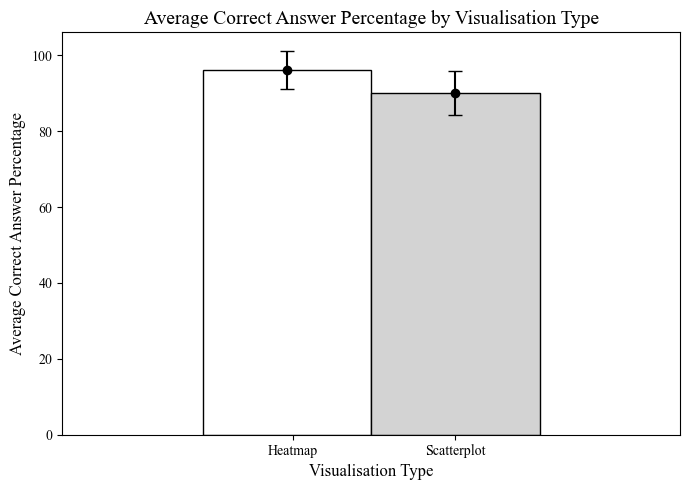

In [13]:
fig, ax = plt.subplots(figsize=(7, 5))

bar_width = 0.3 

total_width = 0.40  
gap = (1 - total_width) / 2  

positions = [gap, gap + bar_width]  

ax.bar(positions, 
       [df2['%correct_HM'].mean(), df2['%correct_SP'].mean()],
       color=['white', 'lightgray'], edgecolor='black', width=bar_width)

ax.errorbar(positions[0], df2['%correct_HM'].mean(), 
            yerr=[[df2['%correct_HM'].mean()-ci_lower_HM], [ci_upper_HM-df2['%correct_HM'].mean()]], 
            fmt='o', color='black', capsize=5, label='CI (Heatmap)')

ax.errorbar(positions[1], df2['%correct_SP'].mean(), 
            yerr=[[df2['%correct_SP'].mean()-ci_lower_SP], [ci_upper_SP-df2['%correct_SP'].mean()]], 
            fmt='o', color='black', capsize=5, label='CI (Scatterplot)')

ax.set_title('Average Correct Answer Percentage by Visualisation Type', fontsize=14)
ax.set_xlabel('Visualisation Type', fontsize=12)
ax.set_ylabel('Average Correct Answer Percentage', fontsize=12)

ax.set_xticks([gap + bar_width/30, gap + bar_width]) 
ax.set_xticklabels(['Heatmap', 'Scatterplot'])

ax.set_xlim([-0.1, 1]) 
plt.tight_layout()
plt.show()

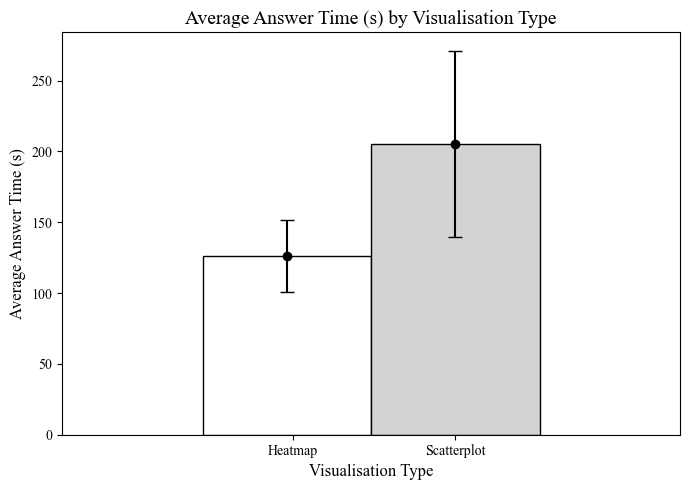

In [14]:
fig, ax = plt.subplots(figsize=(7, 5))

bar_width = 0.3 

total_width = 0.40  
gap = (1 - total_width) / 2  

positions = [gap, gap + bar_width]  

ax.bar(positions, 
       [df2['total_time_HM'].mean(), df2['total_time_SP'].mean()],
       color=['white', 'lightgray'], edgecolor='black', width=bar_width)

ax.errorbar(positions[0], df2['total_time_HM'].mean(), 
            yerr=[[df2['total_time_HM'].mean()-ci_lower_t_HM], [ci_upper_t_HM-df2['total_time_HM'].mean()]], 
            fmt='o', color='black', capsize=5, label='CI (Heatmap)')

ax.errorbar(positions[1], df2['total_time_SP'].mean(), 
            yerr=[[df2['total_time_SP'].mean()-ci_lower_t_SP], [ci_upper_t_SP-df2['total_time_SP'].mean()]], 
            fmt='o', color='black', capsize=5, label='CI (Scatterplot)')

ax.set_title('Average Answer Time (s) by Visualisation Type', fontsize=14)
ax.set_xlabel('Visualisation Type', fontsize=12)
ax.set_ylabel('Average Answer Time (s)', fontsize=12)

ax.set_xticks([gap + bar_width/30, gap + bar_width]) 
ax.set_xticklabels(['Heatmap', 'Scatterplot'])

ax.set_xlim([-0.1, 1]) 

plt.tight_layout()
plt.show()